In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.metrics import confusion_matrix, accuracy_score


# from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
# import time
# import scipy.cluster.hierarchy as sch
# from sklearn.neighbors import NearestNeighbors


# eye candy plots
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
# source https://github.com/dhaitz/matplotlib-stylesheets

# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.linear_model import SGDClassifier
# from sklearn.neighbors import KNeighborsClassifier

In [5]:
df = pd.read_csv("../../data/processed/aggregated_pueblos.csv")

In [6]:
df.province.unique()

array(['Álava', 'Albacete', 'Alicante', 'Almería', 'Ávila', 'Badajoz',
       'Illes Balears', 'Barcelona', 'Burgos', 'Cáceres', 'Cádiz',
       'Castellón', 'Ciudad Real', 'Córdoba', 'A Coruña', 'Cuenca',
       'Girona', 'Granada', 'Guadalajara', 'Gipuzkoa', 'Huelva', 'Huesca',
       'Jaén', 'León', 'Lleida', 'La Rioja', 'Lugo', 'Madrid', 'Málaga',
       'Murcia', 'Navarra', 'Ourense', 'Asturias', 'Palencia',
       'Pontevedra', 'Salamanca', 'Santa Cruz de Tenerife', 'Cantabria',
       'Segovia', 'Sevilla', 'Soria', 'Tarragona', 'Teruel', 'Toledo',
       'Valencia', 'Valladolid', 'Bizkaia', 'Zamora', 'Zaragoza', 'Ceuta',
       'Melilla'], dtype=object)

In [7]:
df = df.drop(df[df['province'].isin(["Illes Balears", "Santa Cruz de Tenerife"])].index)

<Axes: xlabel='total_population', ylabel='Count'>

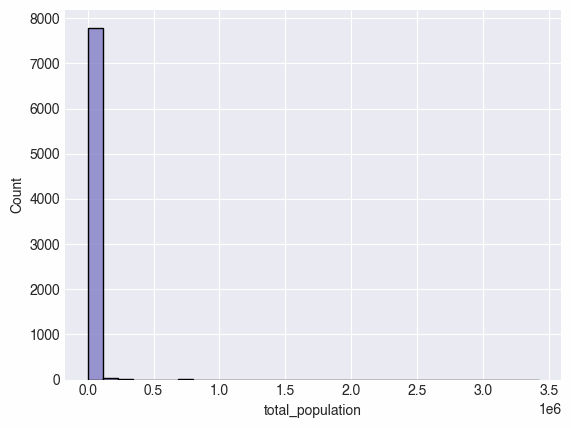

In [8]:
sns.histplot(df, x="total_population", bins=30)


<Axes: ylabel='total_population'>

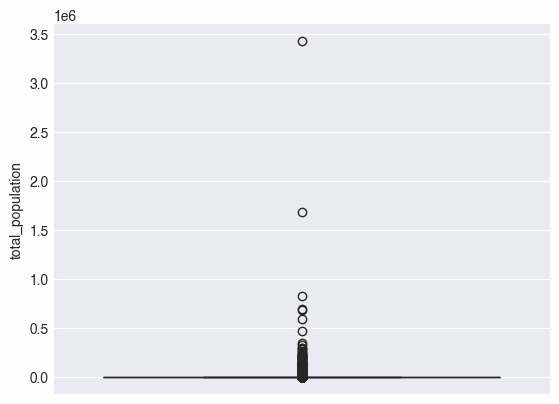

In [9]:
# Plotting the boxplot
sns.boxplot(df["total_population"], color="teal")

In [10]:
# Define function to print the whiskers of a boxplot

def calculate_whiskers(df, column):
    """
    Calculate the lower and upper whiskers for a specified column in a DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The column name to calculate whiskers for.

    Returns:
        tuple: (lower_whisker, upper_whisker)
    """
    # Get descriptive statistics for the column
    stats = df[column].describe()
    Q1 = stats['25%']
    Q3 = stats['75%']
    IQR = Q3 - Q1

    # Calculate the lower whisker
    lower_whisker = max(
        df[column][df[column] >= (Q1 - 1.5 * IQR)].min(), 
        df[column].min()
    )
    
    # Calculate the upper whisker
    upper_whisker = min(
        df[column][df[column] <= (Q3 + 1.5 * IQR)].max(), 
        df[column].max()
    )
    
    return lower_whisker, upper_whisker

In [11]:
lower, upper = calculate_whiskers(df, "total_population")
print("Upper Whisker total population", upper)

Upper Whisker total population 5378


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7840 entries, 0 to 7957
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cmun                       7840 non-null   int64  
 1   province                   7840 non-null   object 
 2   municipality               7840 non-null   object 
 3   altitude                   7840 non-null   float64
 4   longitude                  7840 non-null   float64
 5   latitude                   7840 non-null   float64
 6   0-17                       7840 non-null   int64  
 7   18-24                      7840 non-null   int64  
 8   25-34                      7840 non-null   int64  
 9   35-54                      7840 non-null   int64  
 10  55+                        7840 non-null   int64  
 11  male                       7840 non-null   int64  
 12  female                     7840 non-null   int64  
 13  total_population           7840 non-null   int64  
 1

In [13]:
df_cities = df.query("total_population > 20000")

In [14]:
title = "Cities in Spain"

lats = df_cities.latitude
lons = df_cities.longitude

fig = px.scatter_map(df_cities, 
                     lat=lats, 
                     lon=lons,
                     hover_data=["municipality"],
                     color_continuous_scale=px.colors.carto.Aggrnyl,
                     zoom=5,
                     size_max=50  # Increase max size of markers
                     )

# Adjust the size reference to make small points more visible
fig.update_traces(marker=dict(sizeref=1000))  # Decrease this value to make points larger

fig.update_geos(fitbounds="locations")
fig.update_layout(height=1000, width=1000)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":50,"t":50,"l":50,"b":50})
fig.update_layout(
    coloraxis_colorbar=dict(title='asdf')
)
fig.update_layout(title="Major in Spain ")

fig.show()

In [15]:
df_cities.to_csv("../../data/processed/split_cities.csv")

In [16]:
df_cities

,cmun,province,municipality,altitude,longitude,latitude,0-17,18-24,25-34,35-54,...,vdsl_30mbps,fixed_wireless,ftth,hfc,reception_30mbps,reception_100mbps,reception_1gbps,4g,5g,"5g_3,5ghz"
41,1059,Álava,Vitoria-Gasteiz,534.358200,-2.667893,42.84641,42947,17680,25583,77218,...,0.11,1.00,0.99,0.01,0.99,0.98,0.99,1.0,1.00,0.97
50,2003,Albacete,Albacete,685.957300,-1.860070,38.99765,30616,13617,19673,52956,...,0.08,0.99,0.97,0.90,1.00,0.95,0.92,1.0,0.99,0.96
56,2009,Albacete,Almansa,699.092300,-1.097517,38.86941,3927,1762,2567,7080,...,0.11,0.97,0.87,0.00,1.00,0.92,0.00,1.0,0.92,0.00
84,2037,Albacete,Hellín,571.843800,-1.703310,38.51216,5362,2671,3788,9081,...,0.06,0.98,0.96,0.68,1.00,0.92,0.91,1.0,0.95,0.07
128,2081,Albacete,Villarrobledo,728.529100,-2.607643,39.26726,4488,2121,2878,7453,...,0.05,0.87,0.79,0.00,0.99,0.79,0.72,1.0,0.81,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,48902,Bizkaia,Erandio,7.186315,-2.946418,43.30746,3717,1704,2302,7817,...,0.16,1.00,0.98,0.24,0.98,0.97,0.97,1.0,1.00,0.90
7663,49275,Zamora,Zamora,657.165800,-5.743778,41.50368,7981,3927,5136,16108,...,0.20,1.00,0.98,0.85,0.98,0.95,0.95,1.0,1.00,0.51
7951,50297,Zaragoza,Zaragoza,204.002700,-0.876538,41.65629,111354,50925,74537,202056,...,0.15,1.00,0.99,0.61,1.00,0.99,0.98,1.0,0.99,0.96
7956,51001,Ceuta,Ceuta,13.477250,-5.316195,35.88829,18151,8386,10785,23963,...,0.23,1.00,0.99,0.00,1.00,0.99,0.98,1.0,0.99,0.77


In [17]:
# df = df.query("total_population <= 6000")

<Axes: xlabel='total_population', ylabel='Count'>

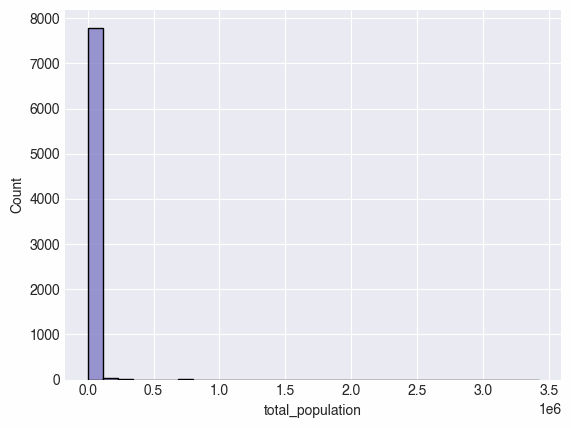

In [18]:
sns.histplot(df, x="total_population", bins=30)

<Axes: ylabel='total_population'>

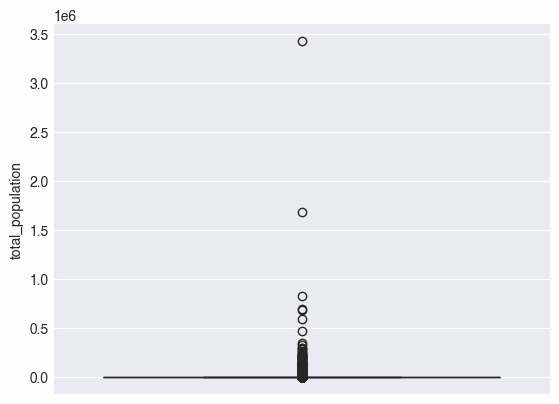

In [19]:
# Plotting the boxplot
sns.boxplot(df["total_population"], color="teal")

In [20]:
df


,cmun,province,municipality,altitude,longitude,latitude,0-17,18-24,25-34,35-54,...,vdsl_30mbps,fixed_wireless,ftth,hfc,reception_30mbps,reception_100mbps,reception_1gbps,4g,5g,"5g_3,5ghz"
0,1001,Álava,Alegría-Dulantzi,561.68570,-2.513507,42.84149,615,250,268,1005,...,0.29,1.00,0.99,0.0,1.00,0.81,0.15,1.00,0.01,0.00
1,1002,Álava,Amurrio,219.69100,-3.001022,43.05265,1826,588,862,2961,...,0.10,1.00,0.92,0.0,0.93,0.87,0.89,1.00,0.96,0.00
2,1003,Álava,Aramaio,381.87970,-2.566000,43.05400,218,113,108,349,...,0.21,0.94,0.85,0.0,0.89,0.78,0.84,1.00,0.60,0.00
3,1004,Álava,Artziniega,196.98080,-3.128209,43.12220,352,127,146,576,...,0.11,1.00,0.87,0.0,0.98,0.95,0.97,1.00,0.84,0.00
4,1006,Álava,Armiñón,463.58150,-2.872574,42.72305,42,20,18,96,...,0.00,0.53,0.87,0.0,0.99,0.84,0.90,0.96,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7953,50901,Zaragoza,Biel,754.24450,-0.936588,42.38749,6,8,16,37,...,0.00,1.00,0.78,0.0,1.00,0.46,0.00,0.85,0.00,0.00
7954,50902,Zaragoza,Marracos,404.73610,-0.776047,42.09059,4,2,4,33,...,0.00,0.95,0.00,0.0,0.99,0.00,0.00,0.39,0.00,0.00
7955,50903,Zaragoza,Villamayor de Gállego,231.12340,-0.773315,41.68518,405,224,320,789,...,0.00,1.00,0.76,0.0,1.00,0.77,0.71,1.00,0.99,0.05
7956,51001,Ceuta,Ceuta,13.47725,-5.316195,35.88829,18151,8386,10785,23963,...,0.23,1.00,0.99,0.0,1.00,0.99,0.98,1.00,0.99,0.77


In [21]:
df.columns

Index(['cmun', 'province', 'municipality', 'altitude', 'longitude', 'latitude',
       '0-17', '18-24', '25-34', '35-54', '55+', 'male', 'female',
       'total_population', 'n_industry', 'n_construction',
       'n_info_communications', 'n_financial_insurance', 'n_real_estate',
       'n_professional_technical', 'n_eduation_health_social', 'n_other',
       'nearest_airport', 'closest_distance_airport', 'nearest_train_station',
       'closest_distance_train', 'closest_distance_hospital',
       'nearest_hospital', 'closest_distance_school', 'nearest_school',
       'koppen_climate', 'description', 'number_of_houses', 'vdsl_30mbps',
       'fixed_wireless', 'ftth', 'hfc', 'reception_30mbps',
       'reception_100mbps', 'reception_1gbps', '4g', '5g', '5g_3,5ghz'],
      dtype='object')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [Text(0, 0, 'Burgos'),
  Text(1, 0, 'Salamanca'),
  Text(2, 0, 'Barcelona'),
  Text(3, 0, 'Zaragoza'),
  Text(4, 0, 'Guadalajara'),
  Text(5, 0, 'Navarra'),
  Text(6, 0, 'Ávila'),
  Text(7, 0, 'Zamora'),
  Text(8, 0, 'Teruel'),
  Text(9, 0, 'Valencia'),
  Text(10, 0, 'Cuenca'),
  Text(11, 0, 'Lleida'),
  Text(12, 0, 'Valladolid'),
  Text(13, 0, 'Girona'),
  Text(14, 0, 'Cáceres'),
  Text(15, 0, 'León'),
  Text(16, 0, 'Segovia'),
  Text(17, 0, 'Toledo'),
  Text(18, 0, 'Huesca'),
  Text(19, 0, 'Palencia'),
  Text(20, 0, 'Soria'),
  Text(21, 0, 'Tarragona'),
  Text(22, 0, 'Madrid'),
  Text(23, 0, 'La Rioja'),
  Text(24, 0, 'Granada'),
  Text(25, 0, 'Badajoz'),
  Text(26, 0, 'Alicante'),
  Text(27, 0, 'Castel

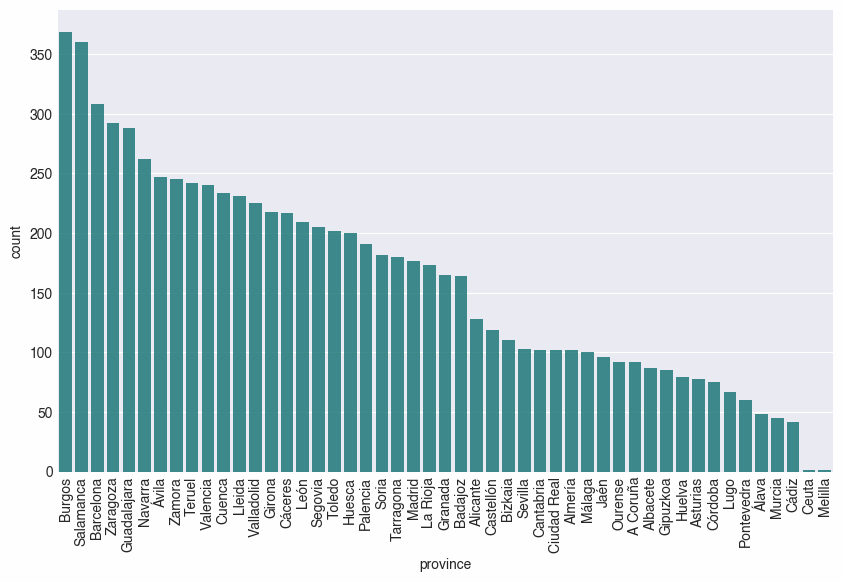

In [22]:
# Create the figure and first y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart for total cost
sns.countplot(data=df, x= "province",order=df["province"].value_counts().index, ax=ax1, color="teal", alpha = 0.8)
plt.xticks(rotation=90)


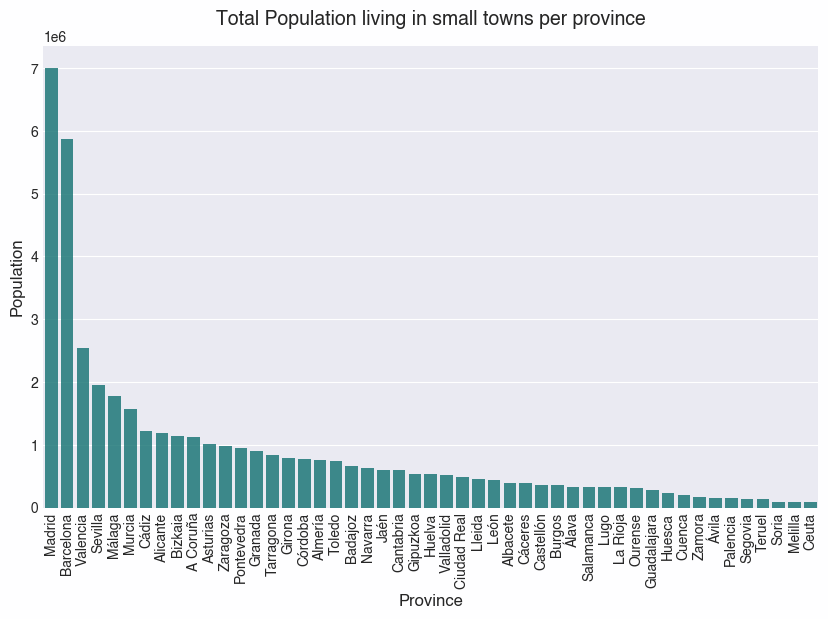

In [23]:
# Group by province and sum the total population
df_grouped = df.groupby("province", as_index=False)["total_population"].sum()

# Sort the grouped DataFrame by total_population in descending order
df_sorted = df_grouped.sort_values(by="total_population", ascending=False)

# Create the figure and first y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart with ordered categories
sns.barplot(x=df_sorted.province, y=df_sorted.total_population, ax=ax1, color="teal", order=df_sorted.province, alpha = 0.8)

ax1.set_ylabel("Population", fontsize=12)
ax1.set_xlabel("Province", fontsize=12)
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', rotation=90)
ax1.set_title("Total Population living in small towns per province", fontsize=14, pad=15)

plt.show()



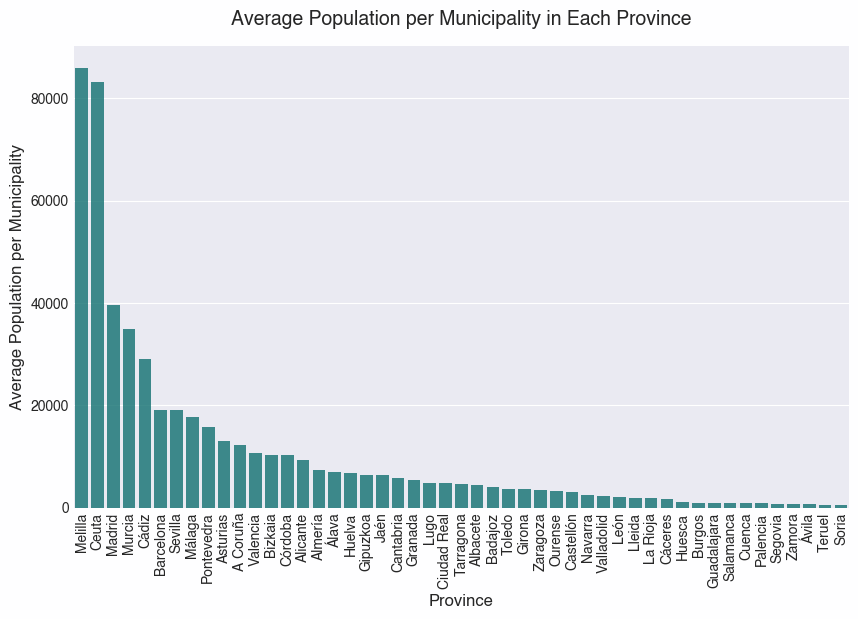

In [24]:
# Group by province and calculate the average population per municipality
df_grouped = df.groupby("province", as_index=False)["total_population"].mean()

# Sort the grouped DataFrame by average total_population in descending order
df_sorted = df_grouped.sort_values(by="total_population", ascending=False)

# Create the figure and first y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart with ordered categories
sns.barplot(x=df_sorted.province, y=df_sorted.total_population, ax=ax1, color="teal", order=df_sorted.province, alpha = 0.8)

ax1.set_ylabel("Average Population per Municipality", fontsize=12)
ax1.set_xlabel("Province", fontsize=12)
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', rotation=90)
ax1.set_title("Average Population per Municipality in Each Province", fontsize=14, pad=15)

plt.show()


In [25]:
# Define function to categorize connectivity levels
def categorize_population(size):
    if size >= 3000:
        return "Big"
    elif size >= 500:
        return "Mid"
    elif size >= 100:
        return "Small"
    else:
        return "Very Small"

# Apply the function to create a new column
df["town_size"] = df["total_population"].apply(categorize_population)

In [26]:
df

,cmun,province,municipality,altitude,longitude,latitude,0-17,18-24,25-34,35-54,...,fixed_wireless,ftth,hfc,reception_30mbps,reception_100mbps,reception_1gbps,4g,5g,"5g_3,5ghz",town_size
0,1001,Álava,Alegría-Dulantzi,561.68570,-2.513507,42.84149,615,250,268,1005,...,1.00,0.99,0.0,1.00,0.81,0.15,1.00,0.01,0.00,Mid
1,1002,Álava,Amurrio,219.69100,-3.001022,43.05265,1826,588,862,2961,...,1.00,0.92,0.0,0.93,0.87,0.89,1.00,0.96,0.00,Big
2,1003,Álava,Aramaio,381.87970,-2.566000,43.05400,218,113,108,349,...,0.94,0.85,0.0,0.89,0.78,0.84,1.00,0.60,0.00,Mid
3,1004,Álava,Artziniega,196.98080,-3.128209,43.12220,352,127,146,576,...,1.00,0.87,0.0,0.98,0.95,0.97,1.00,0.84,0.00,Mid
4,1006,Álava,Armiñón,463.58150,-2.872574,42.72305,42,20,18,96,...,0.53,0.87,0.0,0.99,0.84,0.90,0.96,0.00,0.00,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7953,50901,Zaragoza,Biel,754.24450,-0.936588,42.38749,6,8,16,37,...,1.00,0.78,0.0,1.00,0.46,0.00,0.85,0.00,0.00,Small
7954,50902,Zaragoza,Marracos,404.73610,-0.776047,42.09059,4,2,4,33,...,0.95,0.00,0.0,0.99,0.00,0.00,0.39,0.00,0.00,Very Small
7955,50903,Zaragoza,Villamayor de Gállego,231.12340,-0.773315,41.68518,405,224,320,789,...,1.00,0.76,0.0,1.00,0.77,0.71,1.00,0.99,0.05,Mid
7956,51001,Ceuta,Ceuta,13.47725,-5.316195,35.88829,18151,8386,10785,23963,...,1.00,0.99,0.0,1.00,0.99,0.98,1.00,0.99,0.77,Big


In [27]:
order = ["Very Small", "Small", "Mid", "Big"]

<Axes: xlabel='town_size', ylabel='count'>

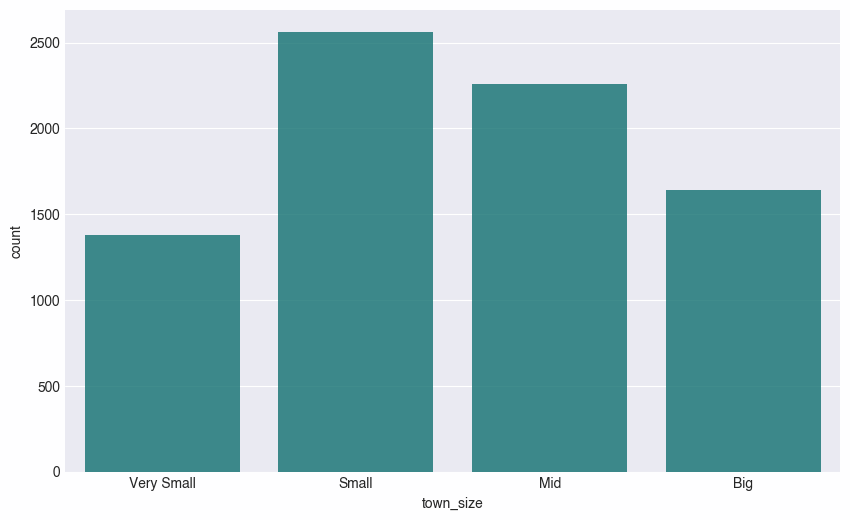

In [28]:
# Create the figure and first y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart for total cost
sns.countplot(data=df, x= "town_size",order=order, ax=ax1, color="teal", alpha = 0.8)

What questions would be useful to answer with this EDA?

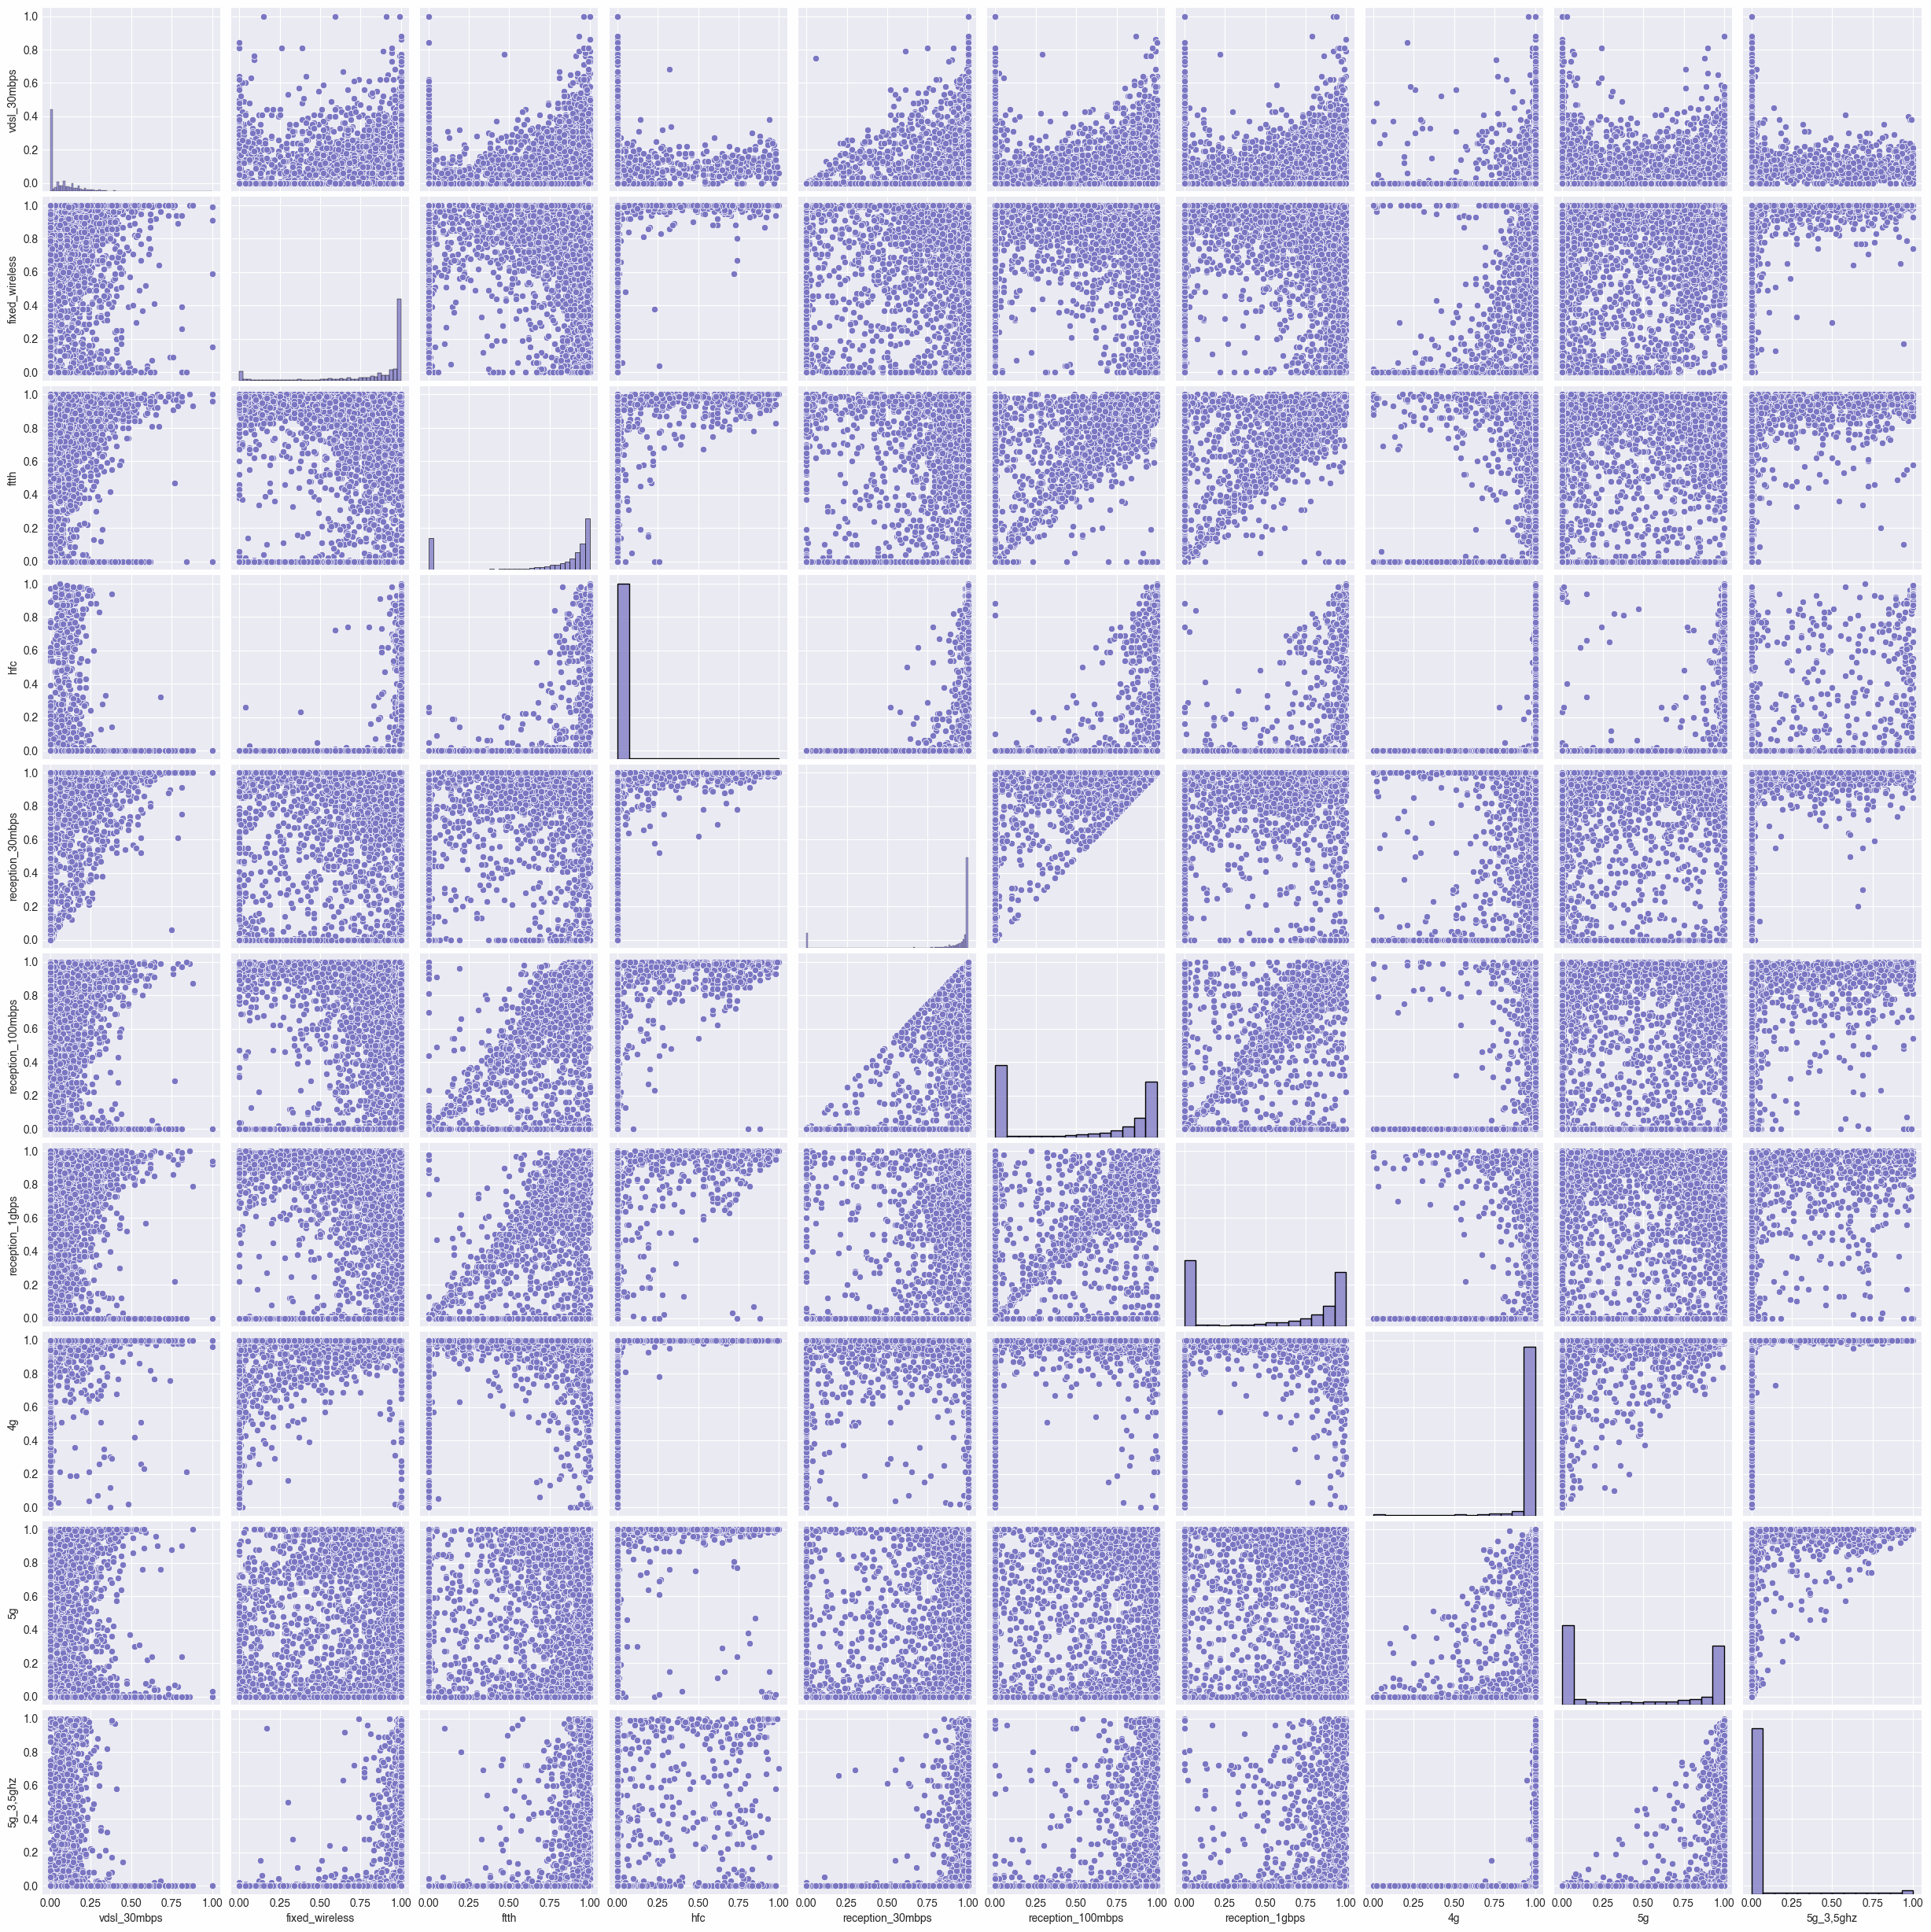

In [29]:
# Group by province and calculate the average population per municipality
df_connectivity = df[['vdsl_30mbps', 'fixed_wireless', 'ftth', 'hfc', 'reception_30mbps','reception_100mbps', 'reception_1gbps', '4g', '5g', '5g_3,5ghz']]

# Plot the bar chart with ordered categories
sns.pairplot(df_connectivity)


Meanings of the Connectivity Indicators:

Each of these refers to a different type of broadband or mobile network connectivity in a town. Here's what they mean:

vdsl_30mbps → Availability of VDSL (Very-high-bit-rate Digital Subscriber Line) at 30 Mbps. A faster version of DSL that uses telephone lines.
fixed_wireless → Percentage of coverage by Fixed Wireless Access (FWA), which provides broadband via radio signals instead of cables.
ftth → Fiber-to-the-Home (FTTH) availability, meaning direct fiber optic connections to residences (highest speed and reliability).
hfc → Hybrid Fiber-Coaxial (HFC) availability, a mix of fiber optics and coaxial cable (used in cable internet services).
reception_30mbps → Percentage of the area that can receive at least 30 Mbps (regardless of technology).
reception_100mbps → Percentage of the area that can receive at least 100 Mbps.
reception_1gbps → Percentage of the area that can receive at least 1 Gbps (1000 Mbps).
4g → Coverage of 4G mobile network.
5g → Coverage of 5G mobile network (general).
5g_3,5ghz → Coverage of 5G at 3.5 GHz, a specific frequency band that offers higher speeds and lower latency.

The 3 Most Important Metrics to Define Connectivity in a Town:

ftth (Fiber-to-the-Home)
Why? It's the gold standard for broadband, offering the fastest speeds, low latency, and high reliability.
Key Impact: Towns with high FTTH coverage have superior internet quality.

reception_100mbps or reception_1gbps
Why? This metric shows how much of the town has access to fast internet speeds (regardless of the technology).
Key Impact: Ensures people and businesses can get modern broadband speeds.

5g or 5g_3,5ghz
Why? 5G is essential for mobile and future-proof connectivity (low latency, high-speed mobile broadband).
Key Impact: Towns with strong 5G networks can support smart city applications, IoT, and next-gen mobile services.

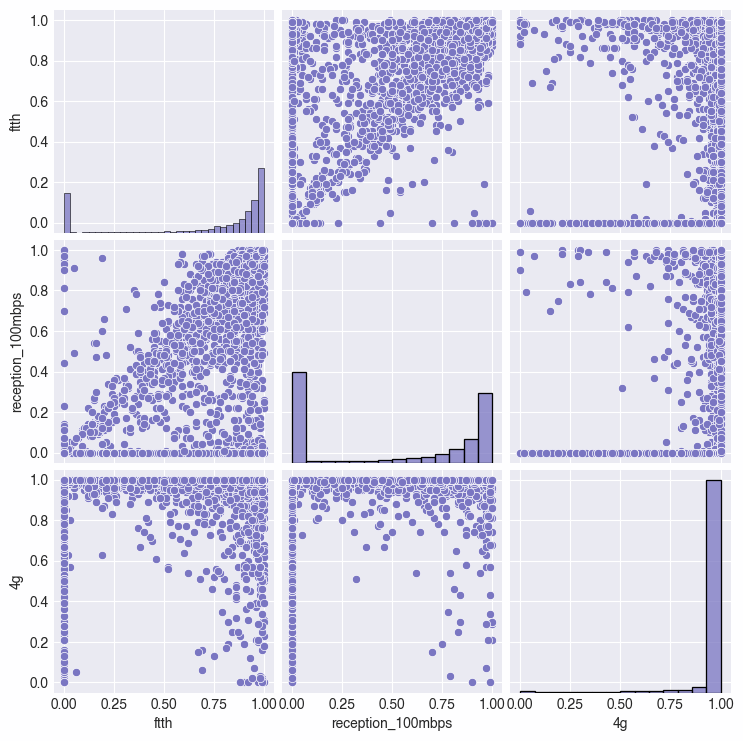

In [30]:
# Group by province and calculate the average population per municipality
df_connectivity = df[[ 'ftth','reception_100mbps', '4g']]

# Plot the bar chart with ordered categories
sns.pairplot(df_connectivity)


### **Adjusted Weight Distribution**
| **Factor**            | **New Weight (%)** | **Reasoning** |
|-----------------------|-------------------|--------------|
| `ftth`               | **50%**            | Fiber is the most important for stable, high-speed connectivity. |
| `reception_100mbps`  | **35%**            | Ensures fast broadband availability, even if not fiber. |
| `4g`                 | **15%**            | Still essential for mobile broadband, but not the primary factor. |

In [31]:
# Define new weights
weights = {
    'ftth': 0.5,
    'reception_100mbps': 0.35,
    '4g': 0.15
}

# Compute the adjusted Connectivity Score
df["connectivity_score"] = (
    df["ftth"] * weights["ftth"] +
    df["reception_100mbps"] * weights["reception_100mbps"] +
    df["4g"] * weights["4g"]
)


### **Connectivity Score Categories**
| **Score Range**  | **Category**          | **Description** |
|------------------|----------------------|----------------|
| **80 - 100**     | **Excellent**         | Strong fiber coverage and high-speed internet. |
| **60 - 79**      | **Good**              | Decent broadband with fiber or high-speed non-fiber options. |
| **40 - 59**      | **Moderate**          | Some high-speed coverage, but fiber may be limited. |
| **20 - 39**      | **Weak**              | Basic connectivity with limited high-speed access. |
| **0 - 19**       | **Poor**              | Very poor or no access to high-speed internet. |

In [32]:
# Define function to categorize connectivity levels
def categorize_connectivity(score):
    if score >= 0.8:
        return "Excellent"
    elif score >= 0.6:
        return "Good"
    elif score >= 0.4:
        return "Moderate"
    elif score >= 0.2:
        return "Weak"
    else:
        return "Poor"

# Apply the function to create a new column
df["connectivity_category"] = df["connectivity_score"].apply(categorize_connectivity)


In [33]:
df

,cmun,province,municipality,altitude,longitude,latitude,0-17,18-24,25-34,35-54,...,hfc,reception_30mbps,reception_100mbps,reception_1gbps,4g,5g,"5g_3,5ghz",town_size,connectivity_score,connectivity_category
0,1001,Álava,Alegría-Dulantzi,561.68570,-2.513507,42.84149,615,250,268,1005,...,0.0,1.00,0.81,0.15,1.00,0.01,0.00,Mid,0.9285,Excellent
1,1002,Álava,Amurrio,219.69100,-3.001022,43.05265,1826,588,862,2961,...,0.0,0.93,0.87,0.89,1.00,0.96,0.00,Big,0.9145,Excellent
2,1003,Álava,Aramaio,381.87970,-2.566000,43.05400,218,113,108,349,...,0.0,0.89,0.78,0.84,1.00,0.60,0.00,Mid,0.8480,Excellent
3,1004,Álava,Artziniega,196.98080,-3.128209,43.12220,352,127,146,576,...,0.0,0.98,0.95,0.97,1.00,0.84,0.00,Mid,0.9175,Excellent
4,1006,Álava,Armiñón,463.58150,-2.872574,42.72305,42,20,18,96,...,0.0,0.99,0.84,0.90,0.96,0.00,0.00,Small,0.8730,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7953,50901,Zaragoza,Biel,754.24450,-0.936588,42.38749,6,8,16,37,...,0.0,1.00,0.46,0.00,0.85,0.00,0.00,Small,0.6785,Good
7954,50902,Zaragoza,Marracos,404.73610,-0.776047,42.09059,4,2,4,33,...,0.0,0.99,0.00,0.00,0.39,0.00,0.00,Very Small,0.0585,Poor
7955,50903,Zaragoza,Villamayor de Gállego,231.12340,-0.773315,41.68518,405,224,320,789,...,0.0,1.00,0.77,0.71,1.00,0.99,0.05,Mid,0.7995,Good
7956,51001,Ceuta,Ceuta,13.47725,-5.316195,35.88829,18151,8386,10785,23963,...,0.0,1.00,0.99,0.98,1.00,0.99,0.77,Big,0.9915,Excellent


<Axes: xlabel='connectivity_category', ylabel='Count'>

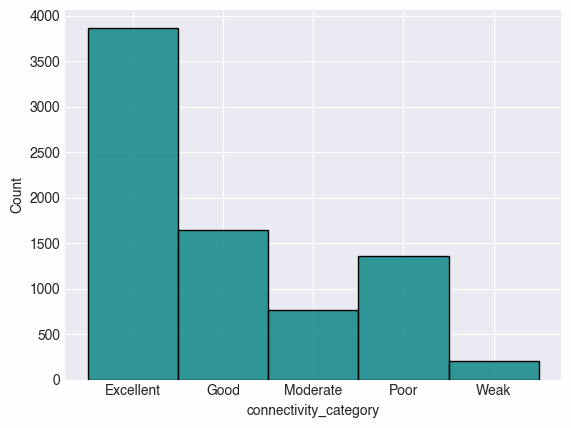

In [34]:
sns.histplot(df, x="connectivity_category", bins=30, color = "teal", alpha = 0.8)

In [35]:
df.drop(columns=["ftth", "hfc", "reception_30mbps", "reception_100mbps", "reception_1gbps", "4g", "5g", "5g_3,5ghz", 'vdsl_30mbps','fixed_wireless'], axis=1, inplace=True)

In [36]:
df[['n_industry', 'n_construction',
       'n_info_communications', 'n_financial_insurance', 'n_real_estate',
       'n_professional_technical', 'n_eduation_health_social', 'n_other']].describe()

,n_industry,n_construction,n_info_communications,n_financial_insurance,n_real_estate,n_professional_technical,n_eduation_health_social,n_other
count,7839.000000,7839.000000,7839.000000,7839.000000,7839.000000,7839.000000,7839.000000,7839.000000
mean,16.523563,27.897108,4.601883,5.521212,12.629035,22.767461,15.552451,19.810851
std,53.695837,80.810740,30.066521,31.423889,62.374442,84.772985,67.441134,76.465429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,959.000000,949.000000,901.000000,945.000000,982.000000,982.000000,975.000000,977.000000


In [37]:
title = "Villages in Spain"

lats = df.latitude
lons = df.longitude

fig = px.scatter_map(df, 
                     lat=lats, 
                     lon=lons,
                     hover_data=["municipality"],
                     color_continuous_scale=px.colors.carto.Aggrnyl,
                     zoom=5,
                     size_max=50  # Increase max size of markers
                     )
# Adjust the size reference to make small points more visible
fig.update_traces(marker=dict(sizeref=1000))  # Decrease this value to make points larger

fig.update_geos(fitbounds="locations")
fig.update_layout(height=1000, width=1000)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":50,"t":50,"l":50,"b":50})
fig.update_layout(
    coloraxis_colorbar=dict(title='asdf')
)
fig.update_layout(title="Major in Spain ")


fig.show()

In [38]:
df[['latitude', 'longitude']].describe()

,latitude,longitude
count,7840.000000,7840.000000
mean,40.885617,-3.027891
std,1.684562,2.667318
min,35.292340,-9.264338
25%,39.994080,-5.083740
50%,41.230320,-3.240668
75%,42.152045,-1.232740
max,43.769200,3.278389


In [39]:
bins = {'lat': np.arange(df['latitude'].min(), df['latitude'].max(), 0.5), 'lon': np.arange(df['longitude'].min(), df['longitude'].max(), 0.5)}

1. make bins of lat, long
2. sort pueplos into the bins
3rd -> for each pueblo: have a look at 1 lower and 1 higer (lat, long)

In [40]:
df = df.copy()

df['lat_bin'] = pd.cut(df['latitude'], bins['lat'], labels=False, include_lowest=True)
df['lon_bin'] = pd.cut(df['longitude'], bins['lon'], labels=False, include_lowest=True)
df['lat_bin'] = df['lat_bin'].fillna(-1).astype(int)
df['lon_bin'] = df['lon_bin'].fillna(-1).astype(int)
df


,cmun,province,municipality,altitude,longitude,latitude,0-17,18-24,25-34,35-54,...,closest_distance_school,nearest_school,koppen_climate,description,number_of_houses,town_size,connectivity_score,connectivity_category,lat_bin,lon_bin
0,1001,Álava,Alegría-Dulantzi,561.68570,-2.513507,42.84149,615,250,268,1005,...,0.171827,Dulantzi Mepu,Cfb,Oceanic Climate - Mild temperatures and consis...,1275.0,Mid,0.9285,Excellent,15,13
1,1002,Álava,Amurrio,219.69100,-3.001022,43.05265,1826,588,862,2961,...,0.375157,Ps Virgen Niña Hlbhip,Cfb,Oceanic Climate - Mild temperatures and consis...,4937.0,Big,0.9145,Excellent,15,12
2,1003,Álava,Aramaio,381.87970,-2.566000,43.05400,218,113,108,349,...,0.483416,Aramaioko Haurreskola-Masusta Phe,Cfb,Oceanic Climate - Mild temperatures and consis...,738.0,Mid,0.8480,Excellent,15,13
3,1004,Álava,Artziniega,196.98080,-3.128209,43.12220,352,127,146,576,...,0.521370,Arteko Gure Ama Hlhi,Cfb,Oceanic Climate - Mild temperatures and consis...,1099.0,Mid,0.9175,Excellent,15,12
4,1006,Álava,Armiñón,463.58150,-2.872574,42.72305,42,20,18,96,...,3.973536,Unamunzaga Hlhi,Csb,"Mediterranean Warm Summer - Cooler, wet winter...",180.0,Small,0.8730,Excellent,14,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7953,50901,Zaragoza,Biel,754.24450,-0.936588,42.38749,6,8,16,37,...,16.686948,ESCUELA MUNICIPAL DE M�SICA,Cfb,Oceanic Climate - Mild temperatures and consis...,498.0,Small,0.6785,Good,14,16
7954,50902,Zaragoza,Marracos,404.73610,-0.776047,42.09059,4,2,4,33,...,8.252614,DE GURREA DE G�LLEGO,Cfa,Humid Subtropical - Hot summers with year-roun...,74.0,Very Small,0.0585,Poor,13,16
7955,50903,Zaragoza,Villamayor de Gállego,231.12340,-0.773315,41.68518,405,224,320,789,...,0.106217,Los Pueyos,BSk,"Cold Semi-Arid Climate - Dry, but with lower t...",1462.0,Mid,0.7995,Good,12,16
7956,51001,Ceuta,Ceuta,13.47725,-5.316195,35.88829,18151,8386,10785,23963,...,26.601648,C.E.I.P. Parque del Estrecho,Csa,"Mediterranean Hot Summer - Hot, dry summers an...",24593.0,Big,0.9915,Excellent,1,7


In [41]:
from geopy.distance import geodesic
lon_max = df['lon_bin'].max()
lat_max = df['lat_bin'].max()

def get_towns_in_vicinity(row: pd.Series, distance):
    cmuns = []
    # Properly handle edge bins and include all surrounding quadrants
    for idx in range(max(0, row['lon_bin'] - 1), min(lon_max + 1, row['lon_bin'] + 2)):
        for idy in range(max(0, row['lat_bin'] - 1), min(lat_max + 1, row['lat_bin'] + 2)):
            cmuns.extend(df.loc[(df['lat_bin'] == idy) & (df['lon_bin'] == idx), 'cmun'].tolist())
    # Get the origin coordinates
    origin = (row['latitude'], row['longitude'])
    # Select rows for comparison
    new_df = df[df["cmun"].isin(cmuns)].copy()
    # Remove the current town if necessary
    new_df = new_df[new_df['cmun'] != row['cmun']]
    # Calculate distances
    new_df["distance"] = [geodesic(origin, (lat, lon)).kilometers for lat, lon in zip(new_df["latitude"], new_df["longitude"])]
    new_df = new_df[new_df["distance"] < distance]
    return new_df['cmun'].to_list()


In [42]:
# Apply the function
df['towns_in_vicinity'] = df.apply(lambda x: get_towns_in_vicinity(x, 40), axis=1)

In [43]:
df_economy = df[['n_industry', 'n_construction',
       'n_info_communications', 'n_financial_insurance', 'n_real_estate',
       'n_professional_technical', 'n_eduation_health_social', 'n_other']]

# Define weights for each economic indicator (summing to 1)
economy_weights = {
    'n_industry': 0.2,
    'n_construction': 0.15,
    'n_info_communications': 0.1,
    'n_financial_insurance': 0.1,
    'n_real_estate': 0.1,
    'n_professional_technical': 0.15,
    'n_eduation_health_social': 0.1,
    'n_other': 0.1
}

# Calculate a weighted economy score using the defined weights
df["economy_score"] = df_economy.multiply(pd.Series(economy_weights)).sum(axis=1)


In [44]:
def combine_economy_scores(row):
    base_score = row["economy_score"]
    vicinity = row["towns_in_vicinity"]
    if vicinity:
        neighbor_scores = df.loc[df["cmun"].isin(vicinity), "economy_score"]
        if not neighbor_scores.empty:
            avg_neighbor_score = neighbor_scores.mean()
        else:
            avg_neighbor_score = 0
        return (base_score + avg_neighbor_score) / 2
    else:
        return base_score

df["economy_score_area"] = df.apply(combine_economy_scores, axis=1)

In [45]:
pd.set_option('display.max_columns', None)

In [46]:
df

,cmun,province,municipality,altitude,longitude,latitude,0-17,18-24,25-34,35-54,55+,male,female,total_population,n_industry,n_construction,n_info_communications,n_financial_insurance,n_real_estate,n_professional_technical,n_eduation_health_social,n_other,nearest_airport,closest_distance_airport,nearest_train_station,closest_distance_train,closest_distance_hospital,nearest_hospital,closest_distance_school,nearest_school,koppen_climate,description,number_of_houses,town_size,connectivity_score,connectivity_category,lat_bin,lon_bin,towns_in_vicinity,economy_score,economy_score_area
0,1001,Álava,Alegría-Dulantzi,561.68570,-2.513507,42.84149,615,250,268,1005,827,1525,1440,2965,18.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,Aeropuerto de Vitoria,18.273217,Alegria-Dulantzi,0.819736,12.665248,Hospital Quirónsalud Vitoria,0.171827,Dulantzi Mepu,Cfb,Oceanic Climate - Mild temperatures and consis...,1275.0,Mid,0.9285,Excellent,15,13,"[1003, 1006, 1009, 1011, 1013, 1014, 1016, 101...",8.10,9.528073
1,1002,Álava,Amurrio,219.69100,-3.001022,43.05265,1826,588,862,2961,4075,5134,5178,10312,63.0,89.0,7.0,10.0,5.0,86.0,46.0,51.0,Aeropuerto de Bilbao,28.762394,Nanclares-Langraiz,30.756835,23.370718,Sanatorio Bilbaíno,0.375157,Ps Virgen Niña Hlbhip,Cfb,Oceanic Climate - Mild temperatures and consis...,4937.0,Big,0.9145,Excellent,15,12,"[1003, 1004, 1006, 1010, 1018, 1020, 1036, 104...",50.75,36.202983
2,1003,Álava,Aramaio,381.87970,-2.566000,43.05400,218,113,108,349,592,709,671,1380,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,Aeropuerto de Vitoria,23.639652,Alegria-Dulantzi,23.176277,6.852571,Organización Sanitaria Integrada Alto Deba,0.483416,Aramaioko Haurreskola-Masusta Phe,Cfb,Oceanic Climate - Mild temperatures and consis...,738.0,Mid,0.8480,Excellent,15,13,"[1001, 1002, 1009, 1013, 1018, 1020, 1021, 102...",1.80,12.170454
3,1004,Álava,Artziniega,196.98080,-3.128209,43.12220,352,127,146,576,655,914,942,1856,5.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,Aeropuerto de Bilbao,26.840606,Nanclares-Langraiz,43.021998,21.025189,Hospital De Basurto,0.521370,Arteko Gure Ama Hlhi,Cfb,Oceanic Climate - Mild temperatures and consis...,1099.0,Mid,0.9175,Excellent,15,12,"[1002, 1010, 1018, 1020, 1036, 1042, 1049, 105...",3.10,11.617662
4,1006,Álava,Armiñón,463.58150,-2.872574,42.72305,42,20,18,96,70,127,119,246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aeropuerto de Vitoria,20.846277,Manzanos,2.240750,11.270621,Hospital Santiago Apóstol,3.973536,Unamunzaga Hlhi,Csb,"Mediterranean Warm Summer - Cooler, wet winter...",180.0,Small,0.8730,Excellent,14,12,"[1001, 1002, 1011, 1013, 1014, 1016, 1018, 101...",0.00,2.459195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7953,50901,Zaragoza,Biel,754.24450,-0.936588,42.38749,6,8,16,37,103,104,66,170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aeropuerto de Huesca Pirineos,61.667966,Riglos,17.531651,38.805217,Hospital De Jaca.Salud,16.686948,ESCUELA MUNICIPAL DE M�SICA,Cfb,Oceanic Climate - Mild temperatures and consis...,498.0,Small,0.6785,Good,14,16,"[22004, 22039, 22044, 22063, 22072, 22076, 221...",0.00,1.718644
7954,50902,Zaragoza,Marracos,404.73610,-0.776047,42.09059,4,2,4,33,42,43,42,85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aeropuerto de Huesca Pirineos,37.961861,Valença Do Minho,12.495085,29.781700,Hospital General San Jorge,8.252614,DE GURREA DE G�LLEGO,Cfa,Humid Subtropical - Hot summers with year-roun...,74.0,Very Small,0.0585,Poor,13,16,"[22004, 22011, 22012, 22014, 22015, 22019, 220...",0.00,4.515678
7955,50903,Zaragoza,Villamayor de Gállego,231.12340,-0.773315,41.68518,405,224,320,789,1114,1444,1408,2852,4.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,Aeropuerto de Zaragoza,23.955690,Villanueva De Gallego,9.820085,7.322715,Hospital Royo Villanova,0.106217,Los Pueyos,BSk,"Cold Semi-Arid Climate - Dry, but with lower t...",1462.0,Mid,0.7995,Good,12,16,"[22018, 22119, 22137, 22197, 22218, 22226, 222...",3.50,7.977717
7956,51001,Ceuta,Ceuta,13.47725,-5.316195,35.88829,1

In [47]:
df.columns

Index(['cmun', 'province', 'municipality', 'altitude', 'longitude', 'latitude',
       '0-17', '18-24', '25-34', '35-54', '55+', 'male', 'female',
       'total_population', 'n_industry', 'n_construction',
       'n_info_communications', 'n_financial_insurance', 'n_real_estate',
       'n_professional_technical', 'n_eduation_health_social', 'n_other',
       'nearest_airport', 'closest_distance_airport', 'nearest_train_station',
       'closest_distance_train', 'closest_distance_hospital',
       'nearest_hospital', 'closest_distance_school', 'nearest_school',
       'koppen_climate', 'description', 'number_of_houses', 'town_size',
       'connectivity_score', 'connectivity_category', 'lat_bin', 'lon_bin',
       'towns_in_vicinity', 'economy_score', 'economy_score_area'],
      dtype='object')

<Axes: xlabel='latitude', ylabel='Count'>

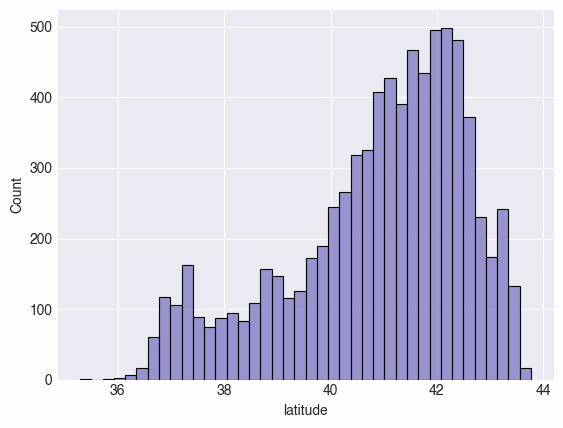

In [48]:
sns.histplot(df.latitude)

<Axes: xlabel='longitude', ylabel='Count'>

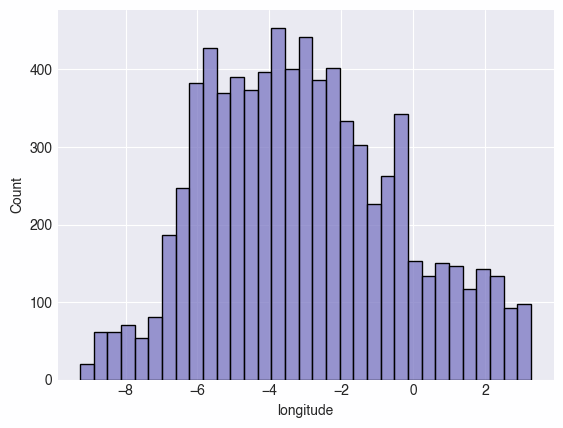

In [49]:
sns.histplot(df.longitude)

In [50]:
df["towns_in_vicinity"] = df["towns_in_vicinity"].apply(
    lambda x: ", ".join(map(str, x)) if isinstance(x, list) else x
)

In [51]:
type(df.iloc[0]['towns_in_vicinity'])

df.query("municipality == 'Ferreries'")

,cmun,province,municipality,altitude,longitude,latitude,0-17,18-24,25-34,35-54,55+,male,female,total_population,n_industry,n_construction,n_info_communications,n_financial_insurance,n_real_estate,n_professional_technical,n_eduation_health_social,n_other,nearest_airport,closest_distance_airport,nearest_train_station,closest_distance_train,closest_distance_hospital,nearest_hospital,closest_distance_school,nearest_school,koppen_climate,description,number_of_houses,town_size,connectivity_score,connectivity_category,lat_bin,lon_bin,towns_in_vicinity,economy_score,economy_score_area


In [52]:
df.to_csv("../../data/processed/2_aggregated_pueblos.csv", index=False)

In [53]:
df.towns_in_vicinity.isnull().sum()

np.int64(0)

In [ ]:
df

,cmun,province,municipality,altitude,longitude,latitude,0-17,18-24,25-34,35-54,55+,male,female,total_population,n_industry,n_construction,n_info_communications,n_financial_insurance,n_real_estate,n_professional_technical,n_eduation_health_social,n_other,nearest_airport,closest_distance_airport,nearest_train_station,closest_distance_train,closest_distance_hospital,nearest_hospital,closest_distance_school,nearest_school,koppen_climate,description,number_of_houses,town_size,connectivity_score,connectivity_category,lat_bin,lon_bin,towns_in_vicinity,economy_score,economy_score_area
0,1001,Álava,Alegría-Dulantzi,561.68570,-2.513507,42.84149,615,250,268,1005,827,1525,1440,2965,18.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,Aeropuerto de Vitoria,18.273217,Alegria-Dulantzi,0.819736,12.665248,Hospital Quirónsalud Vitoria,0.171827,Dulantzi Mepu,Cfb,Oceanic Climate - Mild temperatures and consis...,1275.0,Mid,0.9285,Excellent,15,13,"1003, 1006, 1009, 1011, 1013, 1014, 1016, 1017...",8.10,9.528073
1,1002,Álava,Amurrio,219.69100,-3.001022,43.05265,1826,588,862,2961,4075,5134,5178,10312,63.0,89.0,7.0,10.0,5.0,86.0,46.0,51.0,Aeropuerto de Bilbao,28.762394,Nanclares-Langraiz,30.756835,23.370718,Sanatorio Bilbaíno,0.375157,Ps Virgen Niña Hlbhip,Cfb,Oceanic Climate - Mild temperatures and consis...,4937.0,Big,0.9145,Excellent,15,12,"1003, 1004, 1006, 1010, 1018, 1020, 1036, 1042...",50.75,36.202983
2,1003,Álava,Aramaio,381.87970,-2.566000,43.05400,218,113,108,349,592,709,671,1380,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,Aeropuerto de Vitoria,23.639652,Alegria-Dulantzi,23.176277,6.852571,Organización Sanitaria Integrada Alto Deba,0.483416,Aramaioko Haurreskola-Masusta Phe,Cfb,Oceanic Climate - Mild temperatures and consis...,738.0,Mid,0.8480,Excellent,15,13,"1001, 1002, 1009, 1013, 1018, 1020, 1021, 1027...",1.80,12.170454
3,1004,Álava,Artziniega,196.98080,-3.128209,43.12220,352,127,146,576,655,914,942,1856,5.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,Aeropuerto de Bilbao,26.840606,Nanclares-Langraiz,43.021998,21.025189,Hospital De Basurto,0.521370,Arteko Gure Ama Hlhi,Cfb,Oceanic Climate - Mild temperatures and consis...,1099.0,Mid,0.9175,Excellent,15,12,"1002, 1010, 1018, 1020, 1036, 1042, 1049, 1054...",3.10,11.617662
4,1006,Álava,Armiñón,463.58150,-2.872574,42.72305,42,20,18,96,70,127,119,246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aeropuerto de Vitoria,20.846277,Manzanos,2.240750,11.270621,Hospital Santiago Apóstol,3.973536,Unamunzaga Hlhi,Csb,"Mediterranean Warm Summer - Cooler, wet winter...",180.0,Small,0.8730,Excellent,14,12,"1001, 1002, 1011, 1013, 1014, 1016, 1018, 1019...",0.00,2.459195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7953,50901,Zaragoza,Biel,754.24450,-0.936588,42.38749,6,8,16,37,103,104,66,170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aeropuerto de Huesca Pirineos,61.667966,Riglos,17.531651,38.805217,Hospital De Jaca.Salud,16.686948,ESCUELA MUNICIPAL DE M�SICA,Cfb,Oceanic Climate - Mild temperatures and consis...,498.0,Small,0.6785,Good,14,16,"22004, 22039, 22044, 22063, 22072, 22076, 2210...",0.00,1.718644
7954,50902,Zaragoza,Marracos,404.73610,-0.776047,42.09059,4,2,4,33,42,43,42,85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aeropuerto de Huesca Pirineos,37.961861,Valença Do Minho,12.495085,29.781700,Hospital General San Jorge,8.252614,DE GURREA DE G�LLEGO,Cfa,Humid Subtropical - Hot summers with year-roun...,74.0,Very Small,0.0585,Poor,13,16,"22004, 22011, 22012, 22014, 22015, 22019, 2202...",0.00,4.515678
7955,50903,Zaragoza,Villamayor de Gállego,231.12340,-0.773315,41.68518,405,224,320,789,1114,1444,1408,2852,4.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,Aeropuerto de Zaragoza,23.955690,Villanueva De Gallego,9.820085,7.322715,Hospital Royo Villanova,0.106217,Los Pueyos,BSk,"Cold Semi-Arid Climate - Dry, but with lower t...",1462.0,Mid,0.7995,Good,12,16,"22018, 22119, 22137, 22197, 22218, 22226, 2223...",3.50,7.977717
7956,51001,Ceuta,Ceuta,13.47725,-5.316195,35.88829,1